#  ATOC5860 Application Lab #3 - eigenfaces
##### Written by Dr. Vineel Yettella (ATOC Ph.D. 2018, now at Apple), with additional commenting from Prof. Kay (CU)
##### last updated February 22, 2023 - works with environment atoc5860env2023clean.yml

### LEARNING GOALS:
1) Complete an EOF analysis using Singular Value Decomposition (SVD). 
2) Provide a qualitative description of the results. What are the eigenvalues, the eigenvectors, and the principal components?  What do you learn from each one about the space-time structure of your underlying dataset?

Each EOF gives us a pattern that explains an eigenvalue's worth of variance in the dataset. The PCs allow us to reconstruct a frame of the dataset as a linear sum of the EOFs. The EOF maps show us the dominant patterns of variance in our dataset -- e.g. if in our first EOF one quadrant is positive and another is negative, then this structure tells us that these regions are anticorrelated and that they drive overall variance in the dataset.

3) Provide a qualitative description of the results: What are the eigenvalue,the eigenvector, and the principal component?  What do they mean physically? What do you learn from each one about the space-time structure of the underlying dataset?

The eigenvalue tells us the variance explained by the eigenvector (EOF), and the principal components tell us how much a given sample "looks like" each eigenvector.

4) Reconstruct original data using a subset of EOFs: How many EOFs are needed to reconstruct faces?

100 is enough to ID, but it needs to be closer to 300 to actually look realistic and not super scratchy.

### DATA and UNDERLYING SCIENCE MOTIVATION:  
In this notebook, you apply EOF analysis to a standard database for facial recognition: the At&t database. 

*“Our Database of Faces, (formerly 'The ORL Database of Faces'), contains a set of face images taken between April 1992 and April 1994 at the lab. The database was used in the context of a face recognition project carried out in collaboration with the Speech, Vision and Robotics Group of the Cambridge University Engineering Department.

There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).”*

The goal is to think a bit “out of the box” of Atmospheric and Oceanic Sciences about potential applications for the methods you are learning in this class.  And also to think about some of the pitfalls of using statistics for facial recognition. Are the faces here representative of all faces?

### Non-exhaustive Questions to guide your analysis:  
1) Execute all code without making any modifications. What do the EOFs (spatial patterns) tell you?  What do the PCs tell you?  How do you interpret what you are finding?

The spatial patterns tell me which areas are the most useful for distinguishing the faces in the dataset. Perhaps characteristic of an AT&T lab in the early 90s, the hairline is the most important structure for explaining the variance (!). Then come brows, eyes, jawline, but many of these areas are repeated across subsequent EOFs with slightly different positioning on the face. The PCs tell me how much each face looks like one of the eigenvectors -- look at the final plot in the notebook, and see how (both men and women) with their hairline exposed have high PC1s while those with bangs or hair which droops below their hairline have much lower PC1s. This is because EOF1 is a hairline pattern. Actually the highest PC1s are those with male-pattern baldness, indicating the bias towards men in the dataset -- i.e., having or not having male pattern baldness explains the largest amount of variance in the dataset.

2) Reconstruct a face.  How many EOFs do you need to reconstruct a face from the database?  Does it depend on the face that it used?

As far as I can tell, the number of EOFs needed for reconstruction does not depend on the face used. By my estimation, about 300 EOFs are needed to get a good reconstruction without the faces getting all scratchy and filled with artifacts. This would correspond to a compression ratio of about 25%

3) Food for thought: The database contains 75% white men.  How do you think this database sampling limitation impacts the utility of the database for subjects who are not white men?  What are some parallels that you might draw when analyzing atmospheric and oceanic sciences datasets?  Hint: Think about the limitations of extrapolation beyond the domain where you have data.

Certainly. The one BIPOC person in the dataset I found (around index 209) has a low PC1, even though he has a high hairline, which would suggest a high PC1, showing how the EOFs are sensitive to skin tone. The dataset reconstructs his face fine, since he's included in the analysis, but I imagine the dataset would perform better for white out-of-dataset subjects than non-white ones. This can be both a good and bad thing depending on the applications of these tools, since facial recognition software is used in surveillance and policing contexts and deployed within power structures which already target marginalized groups.

For atmospheric science, Nicola touched on some of these issues in her lecture -- a +4K climate system may not have the same modes of variability as a PI/PD climate, and so our dominant EOFs from present-day climate may longer be the dominant EOFs of a warmer climate. This could trip us up if we try to study modes of variability in a future climate without considering that we may need to reinterpret/redefine our modes of variability for the perturbed climate.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
#load faces. Adapted from the AT&T face database
att_faces = np.load('att_faces.npy')
height, width, n_faces = att_faces.shape
print((height, width, n_faces))

(112, 92, 400)


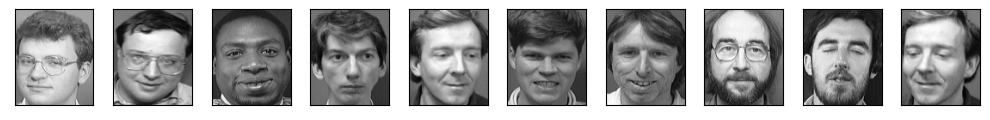

In [68]:
#print a few faces from the database - Look at your data!!
n = 10
fig, axs = plt.subplots(1, n,figsize=(10,10))

random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    ax.imshow(att_faces[:, :, random_face_inds[i]], cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

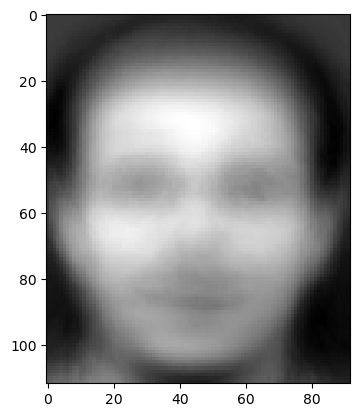

In [28]:
#print the average face
average_face = np.mean(att_faces, axis = 2);
plt.imshow(average_face, cmap = 'gray');

In [29]:
#Construct the data matrix. Samples (different faces) along rows and 
#variables (individual pixels) along columns
print(att_faces.shape)
data_matrix = np.reshape(att_faces, (height*width, n_faces)).T
print(data_matrix.shape)

#Construct anomaly matrix by removing the average face, i.e., 
#by removing the column means from each column of the data_matrix
anomaly_matrix = data_matrix - np.mean(data_matrix, axis=0)
#anomaly_matrix = anomaly_matrix/np.std(anomaly_matrix, axis=0)
[eofs, s, v] = np.linalg.svd(anomaly_matrix.T, full_matrices=False)
print(eofs.shape)

eigenvals = np.square(s)
variance_explained = eigenvals/np.sum(eigenvals)

(112, 92, 400)
(400, 10304)
(10304, 400)


In [34]:
s.shape

(400,)

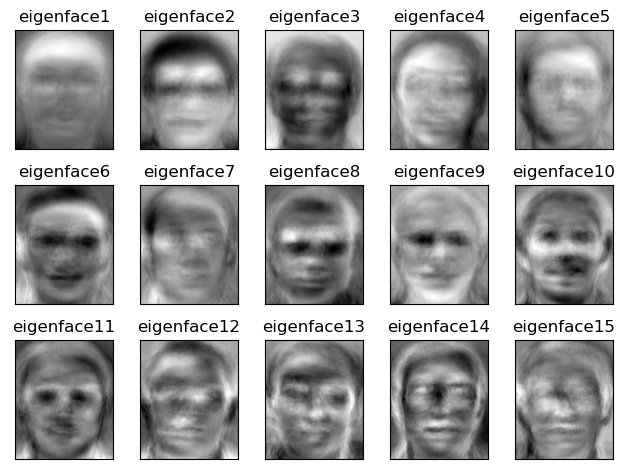

In [30]:
#Plot the top 15 eofs (a.k.a eigenfaces)

fig, axs = plt.subplots(3, 5)

for i, ax in enumerate(np.reshape(axs, 15)):
    eigenface = np.reshape(eofs[:, i], [height, width])
    ax.imshow(eigenface, cmap='gray')
    ax.set_title('eigenface' + str(i+1))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

fig.tight_layout()

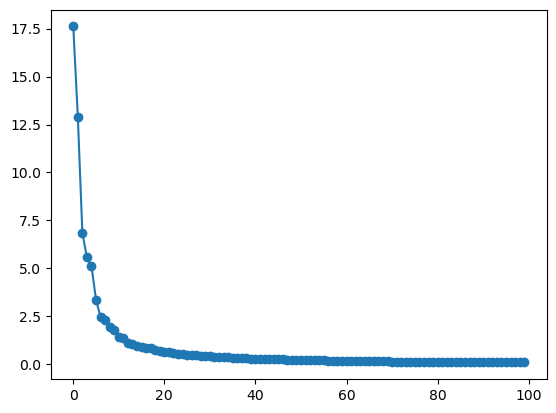

In [31]:
#Plot variance explained by each eigenface
plt.plot(variance_explained[0:100]*100, marker='o')

(400, 400)
(150,)
(112, 92)


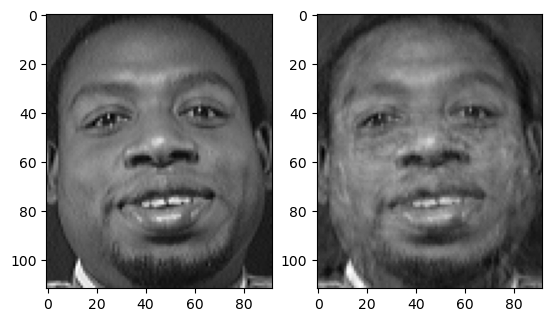

In [96]:
#project the faces onto the eigenfaces
weights = np.dot(anomaly_matrix, eofs)
print(weights.shape)

#choose a face to reconstruct
face_num = 209 #0 to 389
original_face = att_faces[:, :, face_num]

#choose number of weights to reconstruct face
weights_num = 150
face_weights = weights[face_num, 0:weights_num]
print(face_weights.shape)
reconstructed_face = np.dot(eofs[:, 0:weights_num], face_weights)

#At this point, the reconstructed face is an anomaly face with the average face removed. 
#Add back the average face to get the original face

reconstructed_face = np.reshape(reconstructed_face, (height, width)) + average_face
print(reconstructed_face.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(original_face, cmap='gray');
axs[1].imshow(reconstructed_face, cmap='gray');

In [72]:
np.dot(eigenface.ravel(),face.ravel())

7111.171425051422

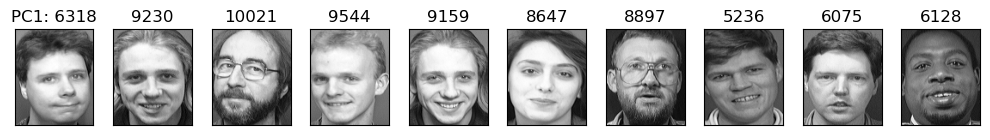

In [100]:
#print a few faces from the database - Look at your data!!
n = 10
fig, axs = plt.subplots(1, n,figsize=(10,10))
eigenface = np.reshape(eofs[:, 0], [height, width])


random_face_inds = np.random.choice(np.arange(n_faces), n, replace=False)
for i, ax in enumerate(axs):
    face = att_faces[:, :, random_face_inds[i]]
    ax.imshow(face, cmap = 'gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    #ax.set_title(random_face_inds[i])
    if i==0: ax.set_title(f'PC1: {np.dot(eigenface.ravel(),face.ravel()):.0f}')
    else:  ax.set_title(f'{np.dot(eigenface.ravel(),face.ravel()):.0f}')

fig.tight_layout()